# setting gpu

for use local gpu run this comand in anaconda prompet and copy url and paste on colab:

    pip install jupyter_http_over_ws
    jupyter serverextension enable --py jupyter_http_over_ws
    jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

https://research.google.com/colaboratory/local-runtimes.html  


In [ ]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

GeForce RTX 2080 with Max-Q Design
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
      # tf.config.experimental.set_virtual_device_configuration(gpu,
      #                                                         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*6)])

  except RuntimeError as e:
    print(e)


if len(tf.config.list_physical_devices('GPU')) > 0:
  !nvidia-smi --query-gpu=gpu_name,driver_version,memory.total --format=csv

name, driver_version, memory.total [MiB]
GeForce RTX 2080 with Max-Q Design, 461.33, 8192 MiB


# requirement package

In [ ]:
%%capture
# !pip install Levenshtein
# !pip install transformers
# !pip install hazm

In [ ]:
from torch.nn import functional as F
import torch
import Levenshtein
import re
from hazm import *

In [ ]:
import os
import numpy as np
import pandas as pd 
# from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

In [ ]:
import sys

In [ ]:
import random
from tqdm import tqdm
import re

In [ ]:
! pip install tensorflow_hub

  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.7.3 requires tensorflow<2.8,>=2.7.0, but you have tensorflow 2.9.1 which is incompatible.


In [ ]:
#all imports
import pickle
import numpy as np
import pandas as pd

import tensorflow_hub as hub

from tensorflow.keras.models import Model

import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
import re
from tqdm import tqdm

from nltk.tokenize import word_tokenize 
from nltk import pos_tag 

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Conv2D, Flatten , Input , Conv1D , Concatenate , MaxPooling1D , Dropout , Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM
import datetime

from keras.layers import Concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding
from sklearn.metrics import  f1_score , roc_auc_score
import os

import tensorflow as tf
import datetime
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import nltk.translate.bleu_score as bleu


tf.__version__

'2.9.1'

# DATA

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
print()

In [ ]:
# %cd /content/drive/MyDrive/NLP/HW3/NLP-HW3-Resources/

import zipfile

datasets = ["cultural.zip", "economics.zip", "politics.zip", "sports.zip"]
data = []


for dataset in datasets:
    with zipfile.ZipFile(dataset) as zipper:
        with zipper.open(dataset.split(".")[0]+'.txt') as fp:
            d = fp.read().decode('utf-8').split('\n')
            data += d #:len(d)//16



# %cd /content/drive/MyDrive/NLP/HW3/

In [ ]:
data= d

In [ ]:
print(d[:10000])

همیشه رسم بر این بوده که با تغییر دولت‌ها و روی‌کارآمدن وزرای جدید، رؤسای سازمان سینمایی هم تغییر می‌کنند. برخلاف کشورهای پیشرفته که مدیران نهادهای کلیدی فرهنگی- هنری مثل رؤسای موزه‌های بزرگ، نهادهای سینمایی و هنری به دور از تغییر دولت‌ها بنا بر تخصص خود همچنان به فعالیت هنری خود ادامه می‌دهند، در ایران از بزرگ‌ترین پست‌ها تا کوچک‌ترین سمت‌ها که بعضا حوزه خدماتی را در بر می‌گیرد، تغییر می‌کنند! شاید هم دلیل اصلی آن دولتی‌بودن فرهنگ و هنر است که امر مدیریت را چنین دستخوش تحولات کرده است... به‌هر‌جهت با استقرار حجت‌الاسلام رئیسی در نهاد ریاست‌جمهوری و حضور محمد اسماعیلی در وزارت فرهنگ و ارشاد اسلامی، محمد خزاعی به‌عنوان رئیس سازمان سینمایی معرفی شد. در پی این انتصاب، تحلیل و نظر برخی از سینماگران را جویا شدیم که می‌خوانید:
به صنوف سینمایی سر بزنید!
سیدضیا هاشمی. تهیه‌کننده ‌و رئیس جامعه  صنفی تهیه‌کنندگان سینما
در شرایط فعلی و با توجه به ناملایماتی که در حوزه سینما وجود دارد، باید اهالی این هنر‌صنعت ایشان را در اداره هرچه بهتر امور کمک کنند. پیوند و اتصالی که می‌تواند میان سینما و تلویزی

**Manipulating the data according to the required Input formatting**

The input format required by BERT asks us to add special tokens to the start and end of the sentence, pad and truncate all the sentences to a specific constant length and differentiate the pads from tokens by using attention masks.

To get an idea about the length of the description and its corresponding frequency

As we have to explicitly pad and truncate all the sentences to a fixed constant length, visualisation of the text length of the cleaned and pre processed data is done in order to select a value that is as close to the actual value (so that we do not lose useful information)

In [ ]:
seq_len = [len(i.split()) for i in data]

[(0.0, 500.0)]

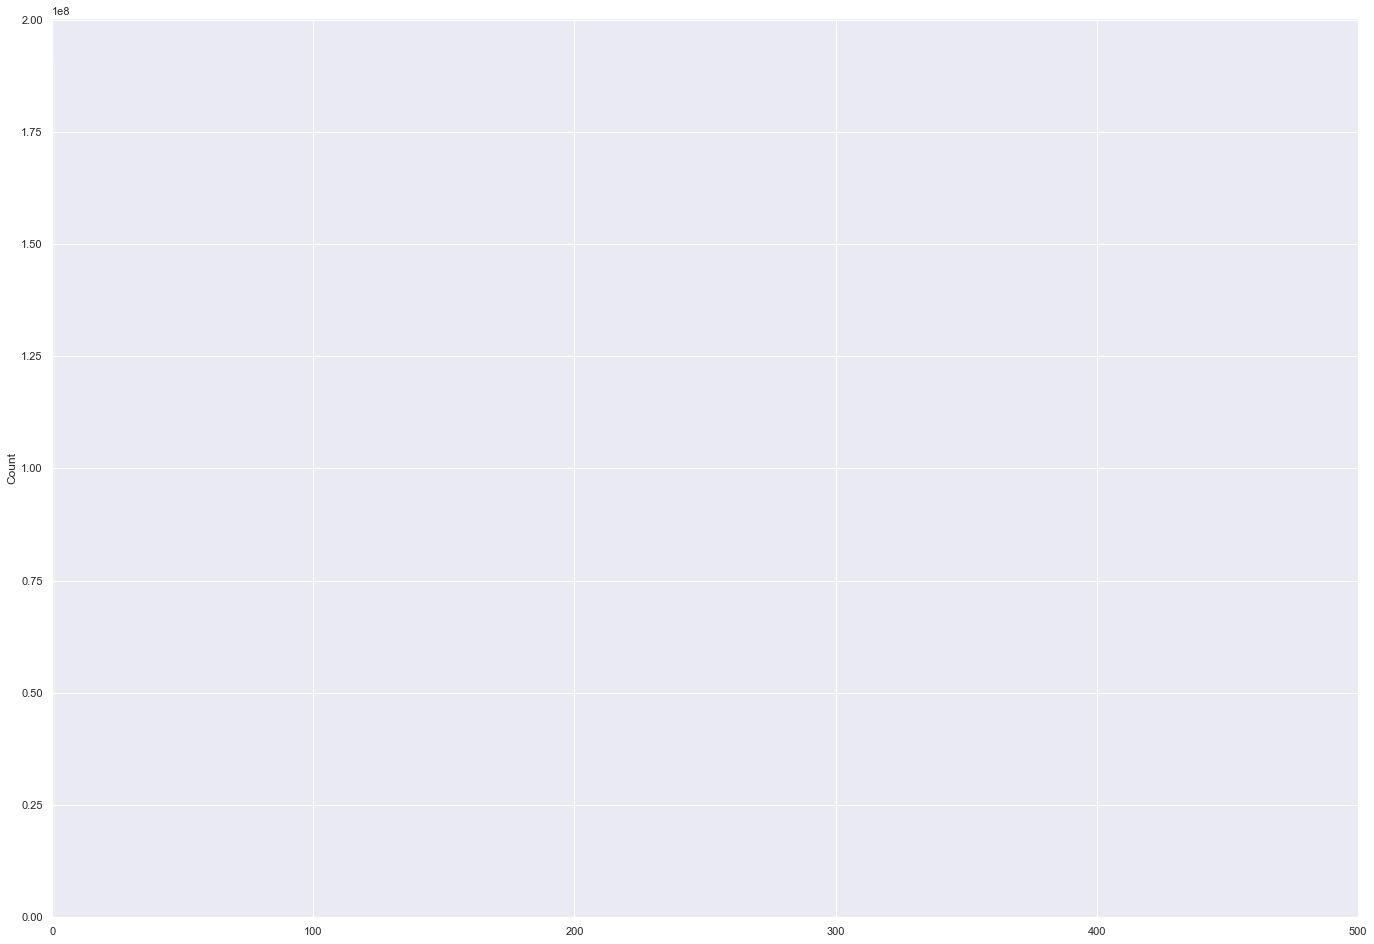

In [ ]:
sns.set(rc={'figure.figsize':(11.7*2,8.27*2)})
his_plot = sns.histplot(seq_len ,bins=500 )
his_plot.set(xlim=(0,500))

In [ ]:
df_len  = pd.DataFrame(seq_len, columns=['length'])
df_len

,length
0,1
1,1
2,1
3,1
4,1
...,...
234775874,1
234775875,1
234775876,1
234775877,0


In [ ]:
df_len.describe()

,length
count,2.347759e+08
mean,8.126124e-01
std,3.902224e-01
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


From the above graph, we can see that most of the description lengths are less than 100 words.
 <!-- **Hence, the MAX_LEN has been chosen to be 128**. -->

# DATASET CREATION (INPUT-OUTPUT PAIR)


In [ ]:
# %cd /content/drive/MyDrive/NLP/HW3/NLP-HW3-Resources/

import zipfile

datasets = ["cultural.zip", "economics.zip", "politics.zip", "sports.zip"]
data = []


# for dataset in datasets:
dataset = datasets[0]
with zipfile.ZipFile(dataset) as zipper:
    with zipper.open(dataset.split(".")[0]+'.txt') as fp:
        d = fp.read().decode('utf-8')
        # data += d #:len(d)//16



# %cd /content/drive/MyDrive/NLP/HW3/

In [ ]:
data= d

In [ ]:
print(d[:10000])

همیشه رسم بر این بوده که با تغییر دولت‌ها و روی‌کارآمدن وزرای جدید، رؤسای سازمان سینمایی هم تغییر می‌کنند. برخلاف کشورهای پیشرفته که مدیران نهادهای کلیدی فرهنگی- هنری مثل رؤسای موزه‌های بزرگ، نهادهای سینمایی و هنری به دور از تغییر دولت‌ها بنا بر تخصص خود همچنان به فعالیت هنری خود ادامه می‌دهند، در ایران از بزرگ‌ترین پست‌ها تا کوچک‌ترین سمت‌ها که بعضا حوزه خدماتی را در بر می‌گیرد، تغییر می‌کنند! شاید هم دلیل اصلی آن دولتی‌بودن فرهنگ و هنر است که امر مدیریت را چنین دستخوش تحولات کرده است... به‌هر‌جهت با استقرار حجت‌الاسلام رئیسی در نهاد ریاست‌جمهوری و حضور محمد اسماعیلی در وزارت فرهنگ و ارشاد اسلامی، محمد خزاعی به‌عنوان رئیس سازمان سینمایی معرفی شد. در پی این انتصاب، تحلیل و نظر برخی از سینماگران را جویا شدیم که می‌خوانید:
به صنوف سینمایی سر بزنید!
سیدضیا هاشمی. تهیه‌کننده ‌و رئیس جامعه  صنفی تهیه‌کنندگان سینما
در شرایط فعلی و با توجه به ناملایماتی که در حوزه سینما وجود دارد، باید اهالی این هنر‌صنعت ایشان را در اداره هرچه بهتر امور کمک کنند. پیوند و اتصالی که می‌تواند میان سینما و تلویزی

In [ ]:
# input_chars = list(" ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz01234567890") +
input_chars = list("ابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهی") + list("ئؤأآي") + list("٠١٢٣٤٥٦٧٨٩") + list('0123456789')+ [' ']
# output_chars = ["<nop>"] + list("،.؟!:؛/()«»")
output_chars = ["<nop>"] + list(".،؛:") + ['\u200c'] 



In [ ]:
CHARS = ''
for ch in input_chars:
  CHARS+=ch


In [ ]:
# CHARS = "\x00 ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz01234567890.,;:?\"'\n\r\t~!@#$%^&*()-/–—=_+<>{}[]|\\`~\xa0ëµ£"
CHARS = CHARS + ".،؛:" + "?\"'\n\r\t~!@#$%^&*()-/–—=_+<>{}[]|\\`~\xa0ëµ£" + '\x00' + '\u200c'
CHARS

'ابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهیئؤأآي٠١٢٣٤٥٦٧٨٩0123456789 .،؛:?"\'\n\r\t~!@#$%^&*()-/–—=_+<>{}[]|\\`~\xa0ëµ£\x00\u200c'

## GENERATING INPUT-OUTPUT PAIR

In [ ]:
# #CODE HELP FROM TEXT CLASSIFICATION ASSIGNMENT
def pre_process(sample):

#     tags = re.compile('<.*?>')
#     sample = re.sub(tags, '', sample)
    
#     sample = re.sub(r'[^\w]', ' ', sample)

#     sample = re.sub("[\(\[].*?[\)\]]", "", sample)
    sample =  sample.replace('\t', ' ').replace('\n', '').replace('-', '')#.replace(' ', '')
    sample = sample.replace('\n', '')
    sample = sample.replace('...', '.')


#     #CODE FROM REFERENCE NOTEBOOK OF DONORS CHOSE DATASET
#     def decontracted(phrase):
#         # specific
#         phrase = re.sub(r"won't", "will not", phrase)
#         phrase = re.sub(r"can\'t", "can not", phrase)

#         # general
#         phrase = re.sub(r"n\'t", " not", phrase)
#         phrase = re.sub(r"\'re", " are", phrase)
#         phrase = re.sub(r"\'s", " is", phrase)
#         phrase = re.sub(r"\'d", " would", phrase)
#         phrase = re.sub(r"\'ll", " will", phrase)
#         phrase = re.sub(r"\'t", " not", phrase)
#         phrase = re.sub(r"\'ve", " have", phrase)
#         phrase = re.sub(r"\'m", " am", phrase)
#         return phrase
#     sample = decontracted(sample)





    return (sample)


FROM THE CONLL DATASET I VE TAKEN 5 ERROR RULES , ND WILL USE THEM TO GET THE ERRRONEOUS SENTENCES

1.Mec Spelling, punctuation, capitalization, etc.

2.Vt Verb tense : eg. is / was 

3.Article or determiner : eg Internet/The internet

4.Preposition : eg. below / over

5.Redundancy  : eg. repeating words .

In [ ]:
# preposition = ['about',
#  'above',
#  'across',
#  'after',
#  'as',
#  'at',
#  'before',
#  'behind',
#  'between',
#  'but',
#  'by',
#  'for',
#  'from',
#  'in',
#  'to',
#  'of',
#  'off',
#  'on',
#  'to',
#  'until',
#  'up',
#  'with']

preposition = [
'از',
'با',
'بر',
'به',
'در',
# 'توی',
'برای',
'روی',
# 'رو',
'زیر',
'بالای',
'تا',
'بعد از',
'قبل از',
'غیر از',
'راجع بع',
'درباره ی',
'تا',
# '',
# '',

]



In [ ]:

#CREATING A FNC TO GENERATE ERROR IN SENTENCE
# letters    = 'abcdefghijklmnopqrstuvwxyz'
letters    = 'ابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهی' + 'ئؤأآي'
# len(letters) , letters[0] , letters[25]
def generate_error(sentence):
    
    #THIS WILL DECIDE 2 ERRORS
    rand_1 = random.randint(1,8)
    rand_2 = random.randint(1,8)
#     print(rand_1 , rand_2)
    if rand_1 == 1 or rand_2 ==2:
        #SPELLING ERROR
        #CREATING ERROR IN SENTENCE BY REPLACING A RANDOM WORD IN SENTENTENCE WITH A RANDOM WORD
        x = random.randint(0,25)
        y = random.randint(0,25)
        sentence = sentence.replace(letters[x], letters[y])

    elif rand_1 == 2 or rand_2 ==3:
        #PREPOSITION ERROR
        #CREATING ERROR IN SENTENCE BY DELETING A PREPOSITION
        for i in sentence.split() :
            if i in preposition:
                sentence = re.sub(i[0] , i[1],sentence)


    #     #INTRODUCING ARTICLE ERROR
    #     #CREATING ERROR IN SENTENCE BY DELETING A ARTICLE AT SOME PLACES
    #     sentence = re.sub('an ' , '' , sentence)


    #     sentence =  re.sub('a ' , '' , sentence)
    #     sentence =  re.sub('the ' , '' , sentence)
        
        
    elif rand_1 == 3 or rand_2 ==4:
        #INTRODUCING REDUNDANCY
        #REPEATING A WORD IN SENTENCE
        rep = sentence.split(' ')
        w = random.randint(0,len(rep) - 1)
        f = rep[:w + 1] + [rep[w]] + rep[w+1:]
        sentence = ' '.join(f)

    elif rand_1 == 4 or rand_2 ==5:
        sentence = re.sub('\u200c' , '' , sentence)
        sentence = re.sub('.' , '' , sentence)
        sentence = re.sub('،' , '' , sentence)



    # elif rand_1 == 5 or rand_2 ==6:
    #     #OTHER ERRROR : MISSING ERROR
    #     #CREATING ERROR IN SENTENCE BY DELETING A RANDOM WORD IN SENTENTENCE 
    #     print(sentence)
    #     delete = sentence.split(' ')
    #     w = random.randint(0,len(delete) - 1)
    #     sentence = re.sub(delete[w] , '' , sentence)

    elif rand_1 == 6 or rand_2 ==7:
        sentence = re.sub('\u200c' , ' ' , sentence) 
        sentence = re.sub(':' , '' , sentence)
        sentence = re.sub('؛' , '' , sentence)

    else :
        pass
    return sentence

In [ ]:
s = 'سلام، اتفاقاً شما با'
k = generate_error(s)
k

'سلام، اتفاقاً شما اا'

In [ ]:
one = data
sentences_one = one.split('.')
sentences_one = [info+'.' for info in sentences_one]
type(sentences_one) , len(sentences_one) , sentences_one[:2]

(list,
 1566881,
 ['همیشه رسم بر این بوده که با تغییر دولت\u200cها و روی\u200cکارآمدن وزرای جدید، رؤسای سازمان سینمایی هم تغییر می\u200cکنند.',
  ' برخلاف کشورهای پیشرفته که مدیران نهادهای کلیدی فرهنگی- هنری مثل رؤسای موزه\u200cهای بزرگ، نهادهای سینمایی و هنری به دور از تغییر دولت\u200cها بنا بر تخصص خود همچنان به فعالیت هنری خود ادامه می\u200cدهند، در ایران از بزرگ\u200cترین پست\u200cها تا کوچک\u200cترین سمت\u200cها که بعضا حوزه خدماتی را در بر می\u200cگیرد، تغییر می\u200cکنند! شاید هم دلیل اصلی آن دولتی\u200cبودن فرهنگ و هنر است که امر مدیریت را چنین دستخوش تحولات کرده است.'])

In [ ]:
sentences_one = [pre_process(i) for i in tqdm(sentences_one)]

100%|████████████████████████████████████████████████████████████████████| 1566881/1566881 [00:01<00:00, 807750.61it/s]


In [ ]:
# for i in sentences_one:
#   print(sentences_one.index(i))

#   generate_error(i)


In [ ]:
error_sentence_one = [generate_error(i) for i in tqdm(sentences_one)]

100%|█████████████████████████████████████████████████████████████████████| 1566881/1566881 [00:17<00:00, 90874.61it/s]


In [ ]:
data_one = pd.DataFrame()
data_one['input'] = sentences_one
data_one['output'] = error_sentence_one
print(data_one.shape)
data_one.head(5)

(1566881, 2)


,input,output
0,همیشه رسم بر این بوده که با تغییر دولت‌ها و رو...,همیشه رسم بر این بوده که با تغییر دولت‌ها و رو...
1,برخلاف کشورهای پیشرفته که مدیران نهادهای کلید...,برخلاف کشورهای پیشرفته که مدیران نهادهای کلید...
2,.,.
3,.,. .
4,به‌هر‌جهت با استقرار حجت‌الاسلام رئیسی در نها...,به‌هر‌جهت با استقرار حجت‌الاسلام رئیسی در نها...


In [ ]:
data = pd.concat([data_one])
data.columns =['CORRECT_SENTENCE', 'ERRONEOUS_SENTENCE']
print(data.shape)
data.head(10)

(1566881, 2)


,CORRECT_SENTENCE,ERRONEOUS_SENTENCE
0,همیشه رسم بر این بوده که با تغییر دولت‌ها و رو...,همیشه رسم بر این بوده که با تغییر دولت‌ها و رو...
1,برخلاف کشورهای پیشرفته که مدیران نهادهای کلید...,برخلاف کشورهای پیشرفته که مدیران نهادهای کلید...
2,.,.
3,.,. .
4,به‌هر‌جهت با استقرار حجت‌الاسلام رئیسی در نها...,به‌هر‌جهت با استقرار حجت‌الاسلام رئیسی در نها...
5,در پی این انتصاب، تحلیل و نظر برخی از سینماگر...,در پی این انتصاب، تحلیل و نظر برخی از سینماگر...
6,تهیه‌کننده ‌و رئیس جامعه صنفی تهیه‌کنندگان س...,تهیه‌کننره ‌و رئیس جامعه صنفی تهیه‌کننرگان س...
7,پیوند و اتصالی که می‌تواند میان سینما و تلویز...,پیونر و زتصزلی که می‌توزنر میزن سینمز و تلویز...
8,با این مساعدت می‌توان بحران کرونا را بهتر و ر...,
9,حضور آقای جبلی نشان از این دارد که ارتباط سین...,حضور آقای جالی نشان از این دارد که ارتااط سین...


In [ ]:
data = data[data['CORRECT_SENTENCE'] != '.']
data

,CORRECT_SENTENCE,ERRONEOUS_SENTENCE
0,همیشه رسم بر این بوده که با تغییر دولت‌ها و رو...,همیشه رسم بر این بوده که با تغییر دولت‌ها و رو...
1,برخلاف کشورهای پیشرفته که مدیران نهادهای کلید...,برخلاف کشورهای پیشرفته که مدیران نهادهای کلید...
4,به‌هر‌جهت با استقرار حجت‌الاسلام رئیسی در نها...,به‌هر‌جهت با استقرار حجت‌الاسلام رئیسی در نها...
5,در پی این انتصاب، تحلیل و نظر برخی از سینماگر...,در پی این انتصاب، تحلیل و نظر برخی از سینماگر...
6,تهیه‌کننده ‌و رئیس جامعه صنفی تهیه‌کنندگان س...,تهیه‌کننره ‌و رئیس جامعه صنفی تهیه‌کننرگان س...
...,...,...
1566875,هم عمری طولانی و هم كلی مخاطب.,هم عمری طولانی و هم كلی مخاطب.
1566876,یوسف رستمی، پژوهشگر ادبی سراغ یكی از شعرهای آ...,یوسف رسامی، پژوهشگر زدای سرزغ یكی زز شعرهزی آ...
1566877,این شعر به امام حسین(ع) تقدیم شده و جدای از ن...,این شعر به امام حسین(ع) تقدیم شده و جدای از ن...
1566878,در صفحه ۱۲ امروز هم غزل منتشرشده و هم تحلیل و...,رر صفحه ۱۲ امروز هم غزل منتشرشره و هم تحلیل و...


In [ ]:
# data.to_csv('data/input_output_new.csv' , index=False)

## Data Preparation for Model

In [ ]:
data = pd.read_csv('data/input_output_new.csv')
data.head()

,CORRECT_SENTENCE,ERRONEOUS_SENTENCE
0,همیشه رسم بر این بوده که با تغییر دولت‌ها و رو...,همیشه رسم بر این بوده که با تغییر دولت‌ها و رو...
1,برخلاف کشورهای پیشرفته که مدیران نهادهای کلید...,برخلاف کشورهای پیشرفته که مدیران نهادهای کلید...
2,به‌هر‌جهت با استقرار حجت‌الاسلام رئیسی در نها...,NaN
3,در پی این انتصاب، تحلیل و نظر برخی از سینماگر...,در پی این انتصاب، تحلیل و نظر برخی از سینماگر...
4,تهیه‌کننده ‌و رئیس جامعه صنفی تهیه‌کنندگان س...,تهیه‌کننده ‌و ‌و رئیس جامعه صنفی تهیه‌کنندگا...


In [ ]:
data[:2]

,CORRECT_SENTENCE,ERRONEOUS_SENTENCE
0,همیشه رسم بر این بوده که با تغییر دولت‌ها و رو...,همیشه رسم بر این بوده که با تغییر دولت‌ها و رو...
1,برخلاف کشورهای پیشرفته که مدیران نهادهای کلید...,برخلاف کشورهای پیشرفته که مدیران نهادهای کلید...


In [ ]:
type(data.CORRECT_SENTENCE) , data.isnull().sum().sum()

(pandas.core.series.Series, 211479)

In [ ]:
# making new data frame with dropped NA values
data = data.dropna(axis = 0, how ='any')

In [ ]:
length_max = max([len(i) for i in tqdm(data['CORRECT_SENTENCE'])])
length_min = min([len(i) for i in tqdm(data['CORRECT_SENTENCE'])])
avg = [len(i) for i in tqdm(data['CORRECT_SENTENCE'])]
length_avg = np.array([avg]).mean()

length_max , length_min , length_avg


100%|███████████████████████████████████████████████████████████████████| 1292979/1292979 [00:00<00:00, 2740885.90it/s]


(20088, 2, 155.4217794720564)

In [ ]:
CORRECT_SENTENCE_LEN = data['CORRECT_SENTENCE'].str.split().apply(len) 
ERRONEOUS_SENTENCE_LEN = data['ERRONEOUS_SENTENCE'].str.split().apply(len)

In [ ]:
for i in range(0,101,10):
    print(i,np.percentile(ERRONEOUS_SENTENCE_LEN, i))
for i in range(90,101):
    print(i,np.percentile(ERRONEOUS_SENTENCE_LEN, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(ERRONEOUS_SENTENCE_LEN, i))

0 1.0
10 10.0
20 14.0
30 18.0
40 21.0
50 25.0
60 29.0
70 35.0
80 42.0
90 54.0
100 3024.0
90 54.0
91 56.0
92 58.0
93 60.0
94 62.0
95 66.0
96 69.0
97 75.0
98 82.0
99 97.0
100 3024.0
99.1 99.0
99.2 102.0
99.3 105.0
99.4 110.0
99.5 115.0
99.6 121.0
99.7 131.0
99.8 146.0
99.9 176.0
100 3024.0


SINCE 99.2% OF DATA HAS LENGTH LESS THAN 10 , SO SELECTING SENTENCE WITH WORD <100

In [ ]:
l = 10 

data['CORRECT_SENTENCE_LEN'] = data['CORRECT_SENTENCE'].str.split().apply(len)
data = data[data['CORRECT_SENTENCE_LEN'] < l]

data['ERRONEOUS_SENTENCE_LEN'] = data['ERRONEOUS_SENTENCE'].str.split().apply(len)
data = data[data['ERRONEOUS_SENTENCE_LEN'] < l]

#ADDING start and end IN THE SENTENCES
data['english_inp'] = '<start> ' + data['CORRECT_SENTENCE'].astype(str)
data['english_out'] = data['CORRECT_SENTENCE'].astype(str) + ' <end>'

data = data.drop(['CORRECT_SENTENCE','CORRECT_SENTENCE_LEN','ERRONEOUS_SENTENCE_LEN'], axis=1)
print(data.shape)
data.reset_index(inplace=True)
data.head()

(120192, 3)


,index,ERRONEOUS_SENTENCE,english_inp,english_out
0,26,آرزوی سلامت و و توفیق برای ایشان دارم.,<start> آرزوی سلامت و توفیق برای ایشان دارم.,آرزوی سلامت و توفیق برای ایشان دارم. <end>
1,28,فیلم‌نامه‌نویسبه نظرم سیاست فرهنگی ما عین سیا...,<start> فیلم‌نامه‌نویسبه نظرم سیاست فرهنگی ما...,فیلم‌نامه‌نویسبه نظرم سیاست فرهنگی ما عین سیا...
2,46,سیطره عقلانیتعلیرضا رئیسیان.,<start> سیطره عقلانیتعلیرضا رئیسیان.,سیطره عقلانیتعلیرضا رئیسیان. <end>
3,61,هر‌چند کار بسیار سختی است.,<start> هر‌چند کار بسیار سختی است.,هر‌چند کار بسیار سختی است. <end>
4,121,.,<start> .,. <end>


In [ ]:
data.ERRONEOUS_SENTENCE[3] , data.english_inp[3] , data.english_out[3]

(' هر\u200cچند کار بسیار سختی است.',
 '<start>  هر\u200cچند کار بسیار سختی است.',
 ' هر\u200cچند کار بسیار سختی است. <end>')

## Getting train and test

In [ ]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data, test_size=0.2)

In [ ]:
print(train.shape, validation.shape)
#ADDING TO <end> TO ONE OF THE SENTENCES SO THAT TOKENIZER LEARNS THE WORD <end>
train.iloc[0]['english_inp']= str(train.iloc[0]['english_inp'])+' <end>'
train.iloc[0]['english_out']= str(train.iloc[0]['english_out'])+' <end>'

(96153, 4) (24039, 4)


In [ ]:
max_encoder_length = max([len(i) for i in tqdm(train['ERRONEOUS_SENTENCE'])])
max_decoder_length = max([len(i) for i in tqdm(train['english_inp'])])
print(max_encoder_length , max_decoder_length)

100%|███████████████████████████████████████████████████████████████████████| 96153/96153 [00:00<00:00, 1752937.88it/s]

136 144


In [ ]:
train.sample(2)

,index,ERRONEOUS_SENTENCE,english_inp,english_out
75436,756788,اسامي نامزدهاي جايزه‌ي ادبي «اورنج» اعلام شدند.,<start> اسامي نامزدهاي جايزه‌ي ادبي «اورنج» ...,اسامي نامزدهاي جايزه‌ي ادبي «اورنج» اعلام شد...
18058,170889,نقاشی؟نقاشی هم می‌کشم.,<start> نقاشی؟نقاشی هم می‌کشم.,نقاشی؟نقاشی هم می‌کشم. <end>


In [ ]:
validation.sample(2)

,index,ERRONEOUS_SENTENCE,english_inp,english_out
30613,266829,.,<start> .,. <end>
66854,639091,4.,<start> 4.,4. <end>


## TOKENIING

In [ ]:
tknizer_ERRONEOUS_SENTENCE = Tokenizer()
tknizer_ERRONEOUS_SENTENCE.fit_on_texts(train['ERRONEOUS_SENTENCE'].values)
tknizer_CORRECT_SENTENCE = Tokenizer()
tknizer_CORRECT_SENTENCE.fit_on_texts(train['english_inp'].values)

In [ ]:
vocab_size_CORRECT_SENTENCE=len(tknizer_CORRECT_SENTENCE.word_index.keys())
print(vocab_size_CORRECT_SENTENCE)
vocab_size_ERRONEOUS_SENTENCE=len(tknizer_ERRONEOUS_SENTENCE.word_index.keys())
print(vocab_size_ERRONEOUS_SENTENCE)

64792
79977


In [ ]:
tknizer_CORRECT_SENTENCE.word_index['']

KeyError: ignored

In [ ]:
tknizer_CORRECT_SENTENCE.word_index['start'], tknizer_CORRECT_SENTENCE.word_index['end']

KeyError: ignored

In [ ]:
# from transformers import AutoConfig, AutoTokenizer, TFAutoModel

# config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
# tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
# model = TFAutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

# text = "ما در هوشواره معتقدیم با انتقال صحیح دانش و آگاهی، همه افراد می‌توانند از ابزارهای هوشمند استفاده کنند. شعار ما هوش مصنوعی برای همه است."
# tokenizer.tokenize(text)


In [ ]:
# input = tokenizer.encode_plus(text, return_tensors = "pt")
# # mask_index = torch.where(input["input_ids"][0] == tokenizer.mask_token_id)
# input

## TOKENIZER WITH ENGLISH WORDS

In [ ]:
from transformers import pipeline, AutoTokenizer, GPT2LMHeadModel
tokenizer = AutoTokenizer.from_pretrained('bolbolzaban/gpt2-persian')
model = GPT2LMHeadModel.from_pretrained('bolbolzaban/gpt2-persian')
generator = pipeline('text-generation', model, tokenizer=tokenizer, config={'max_length':256})
sample = generator('در یک اتفاق شگفت انگیز، پژوهشگران')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:9 for open-end generation.


In [ ]:
embeddings_index = dict()

for word, coef in tokenizer.vocab.items():
    embeddings_index[word] = coef

embedding_matrix = np.zeros((vocab_size_CORRECT_SENTENCE+1, 100))
for word, i in tknizer_CORRECT_SENTENCE.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embedding_matrix.shape

(64793, 100)

# AutoEncoder

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embedding_dim, input_length, enc_units):
        super().__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        self.enc_units= enc_units
        self.lstm_output = 0
        self.lstm_state_h=0
        self.lstm_state_c=0
        
    def build(self, input_shape):
        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_dim, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_encoder", input_shape=(self.vocab_size,))
        self.lstm = LSTM(self.enc_units, return_state=True, return_sequences=True, name="Encoder_LSTM")
        
    def call(self, input_sentances, training=True):
        input_embedd                        = self.embedding(input_sentances)
        self.lstm_output, self.lstm_state_h,self.lstm_state_c = self.lstm(input_embedd)
        return self.lstm_output, self.lstm_state_h,self.lstm_state_c
    def get_states(self):
        return self.lstm_state_h,self.lstm_state_c

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embedding_dim, input_length, dec_units):
        super().__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.dec_units = dec_units
        self.input_length = input_length
    
    def build(self, input_shape):
        # we are using embedding_matrix weights and not training the embedding layer
        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_dim, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_decoder", weights=[embedding_matrix],input_shape=(self.vocab_size,))
        self.lstm = LSTM(self.dec_units, return_sequences=True, return_state=True, name="Encoder_LSTM")
        
    def call(self, target_sentances, state_h, state_c):
        target_embedd           = self.embedding(target_sentances)
        lstm_output, _,_        = self.lstm(target_embedd, initial_state=[state_h, state_c])
        return lstm_output

# Data pipeline

In [ ]:
class Dataset:
    def __init__(self, data, tknizer_ERRONEOUS_SENTENCE, tknizer_CORRECT_SENTENCE, max_len):
        self.encoder_inps = data['ERRONEOUS_SENTENCE'].values
        self.decoder_inps = data['english_inp'].values
        self.decoder_outs = data['english_out'].values
        self.tknizer_CORRECT_SENTENCE = tknizer_CORRECT_SENTENCE
        self.tknizer_ERRONEOUS_SENTENCE = tknizer_ERRONEOUS_SENTENCE
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tknizer_ERRONEOUS_SENTENCE.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tknizer_CORRECT_SENTENCE.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_CORRECT_SENTENCE.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

In [ ]:
class Dataloder(tf.keras.utils.Sequence):
    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        
        return [batch[0],batch[1]],batch[2]

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

# Model

In [ ]:
class vanilla_model(Model):
    def __init__(self, encoder_inputs_length,decoder_inputs_length, output_vocab_size):
        super().__init__() 
        self.encoder = Encoder(vocab_size=vocab_size_ERRONEOUS_SENTENCE + 1, embedding_dim=100, input_length=encoder_inputs_length, enc_units=256)
        self.decoder = Decoder(vocab_size=vocab_size_CORRECT_SENTENCE + 1, embedding_dim=100, input_length=decoder_inputs_length, dec_units=256)
        self.dense   = Dense(output_vocab_size, activation='softmax')
        
        
    def call(self, data):
        input,output = data[0], data[1]
        encoder_output, encoder_h, encoder_c = self.encoder(input)
        decoder_output                       = self.decoder(output, encoder_h, encoder_c)
        output                               = self.dense(decoder_output)
        return output

In [ ]:
# train_dataset = Dataset(train, tknizer_ERRONEOUS_SENTENCE, tknizer_CORRECT_SENTENCE, 16)
# test_dataset  = Dataset(validation, tknizer_ERRONEOUS_SENTENCE, tknizer_CORRECT_SENTENCE, 16)

train_dataset = Dataset(train, tknizer_ERRONEOUS_SENTENCE, tknizer_CORRECT_SENTENCE, l)
test_dataset  = Dataset(validation, tknizer_ERRONEOUS_SENTENCE, tknizer_CORRECT_SENTENCE, l)

train_dataloader = Dataloder(train_dataset, batch_size=512)
test_dataloader = Dataloder(test_dataset, batch_size=512)

print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(512, 10) (512, 10) (512, 10)


In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
vanilla = vanilla_model(encoder_inputs_length=l,decoder_inputs_length=l,output_vocab_size=vocab_size_CORRECT_SENTENCE)
optimizer = tf.keras.optimizers.Adam(clipnorm=1.0)
vanilla.compile(optimizer= optimizer, loss= loss_function, metrics=['accuracy'])

In [ ]:
optimizer = tf.keras.optimizers.Adam()
vanilla.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
train_steps=train.shape[0]//1024
valid_steps=validation.shape[0]//1024
#TRANING THE MODEL FOR 50 EPOCHS CAUSE , MORE TRAINING GIVES MORE RESULTS
vanilla.fit_generator(train_dataloader, steps_per_epoch=train_steps, epochs=150 , validation_data=train_dataloader, validation_steps=valid_steps )#, callbacks=[stp, chkpt, tfboard]
# model_1.fit_generator(train_dataloader,  epochs=4, validation_data=train_dataloader)
vanilla.summary()

ResourceExhaustedError: ignored

In [ ]:
vanilla.summary()

Model: "vanilla_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_7 (Encoder)         multiple                  8363368   
                                                                 
 decoder_7 (Decoder)         multiple                  6844868   
                                                                 
 dense_7 (Dense)             multiple                  16651544  
                                                                 
Total params: 31,859,780
Trainable params: 31,859,780
Non-trainable params: 0
_________________________________________________________________


# ATTENTION

In [ ]:
#all imports
import pickle
import numpy as np
import pandas as pd

import tensorflow_hub as hub
from tensorflow.keras.models import Model

import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
import re
from tqdm import tqdm

from nltk.tokenize import word_tokenize 
from nltk import pos_tag 

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Conv2D, Flatten , Input , Conv1D , Concatenate , MaxPooling1D , Dropout , Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM
import datetime

from keras.layers import Concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding
from sklearn.metrics import  f1_score , roc_auc_score
import os

import tensorflow as tf
import datetime
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import nltk.translate.bleu_score as bleu


tf.__version__

'2.9.1'

## **Implement custom encoder decoder and attention layers**


**Encoder**


In [ ]:

class Encoder(tf.keras.Model):
    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        self.inp_vocab_size = inp_vocab_size
        self.embedding_size = embedding_size
        self.input_length = input_length
        self.lstm_size= lstm_size
        self.lstm_output = 0
        self.lstm_state_h=0
        self.lstm_state_c=0
        
        self.embedding = Embedding(input_dim=self.inp_vocab_size, output_dim=self.embedding_size, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_encoder")
        self.lstm = LSTM(self.lstm_size, return_state=True, return_sequences=True, name="Encoder_LSTM")


    def call(self,input_sequence,states):
        input_embedd = self.embedding(input_sequence)
        self.lstm_output, self.lstm_state_h,self.lstm_state_c = self.lstm(input_embedd, states)
        return self.lstm_output, self.lstm_state_h,self.lstm_state_c
    
    def initialize_states(self,batch_size):
      self.lstm_state_h = tf.zeros([batch_size , self.lstm_size])
      self.lstm_state_c = tf.zeros([batch_size , self.lstm_size])
      return self.lstm_state_h,self.lstm_state_c

**Attention**


In [ ]:

class Attention(tf.keras.layers.Layer):

  def __init__(self,scoring_function, att_units):
    super(Attention, self).__init__()
    self.scoring_function = scoring_function
    self.att_units = att_units
    self.W1 = tf.keras.layers.Dense(att_units)
    self.W2 = tf.keras.layers.Dense(att_units)
    self.V = tf.keras.layers.Dense(1)

  
  def call(self,decoder_hidden_state,encoder_output):
    
    if self.scoring_function == 'dot':
        decoder_hidden_state_reshaped = tf.reshape(decoder_hidden_state , (decoder_hidden_state.shape[0],decoder_hidden_state.shape[1],1))

        #I WAS USING tf.keras.layers.Dot FOR DOT PRODUCT , BUT IT GAVE INCOMPATIBILITY IN SHAPES , SO NOW I VE USED tf.keras.layers.dot
        score =  tf.keras.layers.dot([ encoder_output , decoder_hidden_state_reshaped] , [2,1]) 
        attention_weights = tf.nn.softmax(score, axis=1)

        context_vector = attention_weights * encoder_output  #
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

        pass
    elif self.scoring_function == 'general':
        decoder_hidden_state_reshaped = tf.reshape(decoder_hidden_state , (decoder_hidden_state.shape[0],decoder_hidden_state.shape[1],1))
        W = tf.random.uniform(shape=[encoder_output.shape[0] , self.att_units , self.att_units])
        score =  tf.keras.layers.dot([ encoder_output , W] , [2,1]) 
        score =  tf.keras.layers.dot([ score , decoder_hidden_state_reshaped] , [2,1]) 
        attention_weights = tf.nn.softmax(score, axis=1)

        context_vector = attention_weights * encoder_output  #
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

        pass
    elif self.scoring_function == 'concat':

        decoder_hidden_state_reshaped = tf.expand_dims(decoder_hidden_state, 1)
        score =  self.V(tf.nn.tanh(self.W1(decoder_hidden_state_reshaped) + self.W2(encoder_output)) )
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * encoder_output  #
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

        pass
    
    

**OneStepDecoder**

In [ ]:
class One_Step_Decoder(tf.keras.Model):
    def __init__(self,tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
        super(One_Step_Decoder, self).__init__()

        # Initialize decoder embedding layer, LSTM 
        self.tar_vocab_size = tar_vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        self.dec_units = dec_units
        self.score_fun = score_fun
        self.att_units = att_units

        self.attention=Attention(score_fun,att_units)
        self.embedding = tf.keras.layers.Embedding(tar_vocab_size, embedding_dim)
        self.lstm = LSTM(self.dec_units , return_state=True, return_sequences=True, name="Decoder_LSTM")
        self.dense = tf.keras.layers.Dense(self.tar_vocab_size)

    def call(self,input_to_decoder, encoder_output, state_h,state_c):
        output = self.embedding(input_to_decoder) # (32, 1, 12)
        context_vector,attention_weights=self.attention(state_h,encoder_output)
        concat = tf.concat([tf.expand_dims(context_vector, 1), output], axis=-1)
        lstm_output, state_h, state_c = self.lstm(concat)
        
        output = self.dense(lstm_output)
        output = tf.reshape(output, (-1, output.shape[2]))

        return output,state_h,state_c,attention_weights,context_vector

**Decoder**

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
        super(Decoder , self).__init__()
        self.out_vocab_size = out_vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        self.dec_units = dec_units
        self.score_fun = score_fun
        self.att_units = att_units

        self.onestep_decoder=One_Step_Decoder(out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)

    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state ):

        all_outputs = tf.TensorArray(tf.float32, size=tf.shape(input_to_decoder)[1])
        for timestep in range(tf.shape(input_to_decoder)[1]):
            output,state_h,state_c,attention_weights,context_vector = self.onestep_decoder(input_to_decoder[: , timestep : timestep + 1] , \
                                                                                           encoder_output , decoder_hidden_state , decoder_cell_state)


            all_outputs = all_outputs.write(timestep , output)
        all_outputs = tf.transpose(all_outputs.stack() , [1,0,2])
        return all_outputs

In [ ]:
out_vocab_size=13 
embedding_dim=12 
input_length=10
dec_units=16 
att_units=16
batch_size=32

target_sentences=tf.random.uniform(shape=(batch_size,input_length),maxval=10,minval=0,dtype=tf.int32)
encoder_output=tf.random.uniform(shape=[batch_size,input_length,dec_units])
state_h=tf.random.uniform(shape=[batch_size,dec_units])
state_c=tf.random.uniform(shape=[batch_size,dec_units])
score_fun = 'concat'
decoder=Decoder(out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)
output=decoder(target_sentences,encoder_output, state_h, state_c)
print(output.shape)

(32, 10, 13)


**Encoder Decoder model**


In [ ]:

class Dataset:
    def __init__(self, data, tknizer_ERRONEOUS_SENTENCE, tknizer_CORRECT_SENTENCE, max_len):
        self.encoder_inps = data['ERRONEOUS_SENTENCE'].values
        self.decoder_inps = data['english_inp'].values
        self.decoder_outs = data['english_out'].values
        self.tknizer_CORRECT_SENTENCE = tknizer_CORRECT_SENTENCE
        self.tknizer_ERRONEOUS_SENTENCE = tknizer_ERRONEOUS_SENTENCE
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tknizer_ERRONEOUS_SENTENCE.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tknizer_CORRECT_SENTENCE.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_CORRECT_SENTENCE.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)


class Dataloder(tf.keras.utils.Sequence):
    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        
        return [batch[0],batch[1]],batch[2]

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [ ]:
# train_dataset = Dataset(train, tknizer_ERRONEOUS_SENTENCE, tknizer_CORRECT_SENTENCE, 16)
# test_dataset  = Dataset(validation, tknizer_ERRONEOUS_SENTENCE, tknizer_CORRECT_SENTENCE, 16)

train_dataset = Dataset(train, tknizer_ERRONEOUS_SENTENCE, tknizer_CORRECT_SENTENCE, 20)
test_dataset  = Dataset(validation, tknizer_ERRONEOUS_SENTENCE, tknizer_CORRECT_SENTENCE, 20)

train_dataloader = Dataloder(train_dataset, batch_size=512)
test_dataloader = Dataloder(test_dataset, batch_size=512)

print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(512, 20) (512, 20) (512, 20)


In [ ]:
class encoder_decoder(tf.keras.Model):
    def __init__(self,score_fun , encoder_inputs_length,decoder_inputs_length, output_vocab_size):
        super().__init__()
        #encoder decoder

        self.score_fun = score_fun

        self.encoder=Encoder(inp_vocab_size = vocab_size_ERRONEOUS_SENTENCE+1,embedding_size = 50,lstm_size = 64,input_length = encoder_inputs_length)
        self.decoder=Decoder(out_vocab_size = vocab_size_CORRECT_SENTENCE+1, embedding_dim = 100, input_length = decoder_inputs_length, dec_units =  64 \
                             ,score_fun = self.score_fun ,att_units = 64)

    def call(self,data):

        input,output = data[0], data[1]
        initial_state= self.encoder.initialize_states(batch_size)
        encoder_output, encoder_h, encoder_c = self.encoder(input , initial_state)

        decoder_output= self.decoder(output,encoder_output, encoder_h, encoder_c)

        return decoder_output

In [ ]:
batch_size=512
score_fun  = 'general'
att_units = 64
model_2  = encoder_decoder(score_fun = score_fun , encoder_inputs_length=20,decoder_inputs_length=10,output_vocab_size=vocab_size_CORRECT_SENTENCE)
optimizer = tf.keras.optimizers.Adam()
model_2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
train_steps=train.shape[0]//1024
valid_steps=validation.shape[0]//1024
#TRANING THE MODEL FOR 20 EPOCHS CAUSE , MORE TRAINING GIVES MORE RESULTS
log_dir="logs1" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
checkpoint = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
model_2.fit_generator(train_dataloader, steps_per_epoch=train_steps, epochs=150, validation_data=train_dataloader, validation_steps=valid_steps , callbacks = checkpoint)
# model_1.fit_generator(train_dataloader,  epochs=4, validation_data=train_dataloader)
model_2.summary()

ResourceExhaustedError: ignored

In [ ]:
model_2.summary()

Model: "encoder_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_8 (Encoder)         multiple                  4028340   
                                                                 
 decoder_10 (Decoder)        multiple                  10749469  
                                                                 
Total params: 14,777,809
Trainable params: 14,777,809
Non-trainable params: 0
_________________________________________________________________
